In [181]:
import tweepy
import json
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [182]:
# bot account training set
df_bots = pd.read_csv('/Users/ramiroochoa/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_3.csv/users.csv')
# human account training set
df_human = pd.read_csv('/Users/ramiroochoa/Desktop/cresci-2017.csv/datasets_full.csv/genuine_accounts.csv/users.csv')


## Create Bot DataFrame

In [183]:
def mod_df(df):
    
    # customize table to remove undesirable columns
    columns = list(df)
    df = df[[
     'id',
     'name',
     'screen_name',
     'statuses_count',
     'followers_count',
     'friends_count',
     'favourites_count',
     'listed_count',
     'created_at',
     'timestamp',

            
        ]].copy()
    # add constant
    #df = sm.add_constant(df)
    # add bot identifier
    df['bot']=1

   
    return df

In [184]:
# modify bot dataframe features
mod_bots_df = mod_df(df_bots[:400])

In [185]:
def get_frequency_bot(timestamp):
    bot_year = []
    for i in range(len(bot_time)):
        y = int(bot_time[i][:4])
        bot_year.append(y)

    bot_yrs = []
    for i in bot_year:
        yr = 2018 - i
        bot_yrs.append(yr)

    bot_count = mod_bots_df['statuses_count']

    bot_freq = []
    s=0
    for i in bot_count:
        ya = i/bot_yrs[s]
        s+=1
        bot_freq.append(ya)
    return bot_freq


In [186]:
# get bots timestamp
bot_time = mod_bots_df['timestamp']
# call timestamp to frequency function
bot_freq = get_frequency_bot(bot_time)
# add feautre to dataframe
mod_bots_df['status_frequency']=bot_freq

## Create Human Dataframe

In [187]:
def mod_df_human(df):
    
    # customize table to remove undesirable columns
    columns = list(df)
    df = df[[
     'id',
     'name',
     'screen_name',
     'statuses_count',
     'followers_count',
     'friends_count',
     'favourites_count',
     'listed_count',
     'created_at',
     'timestamp',

        ]].copy()
    # add constant
    #df = sm.add_constant(df)
    # add human identifier
    df['bot']=0

    return df

In [188]:
def get_frequency_human(timestamp):
    #mod_hum_df['timestamp'][0][:4]
    hum_year = []
    for i in range(len(hum_time)):
        y = int(hum_time[i][:4])
        hum_year.append(y)
    hum_yrs = []
    for i in hum_year:
        ya = 2018 - i
        hum_yrs.append(ya)
    hum_count = mod_hum_df['statuses_count']
    hum_freq = []
    s=0
    for i in hum_count:
        ya = i/hum_yrs[s]
        s+=1
        hum_freq.append(ya)
    return hum_year

In [189]:
# remove undesireable features
mod_hum_df = mod_df_human(df_human[:400])


In [190]:
# get human timestamp
hum_time = mod_hum_df['timestamp']
# call timestamp to frequency function
hum_freq = get_frequency_human(hum_time)
# add feautre to dataframe
mod_hum_df['status_frequency']=hum_freq

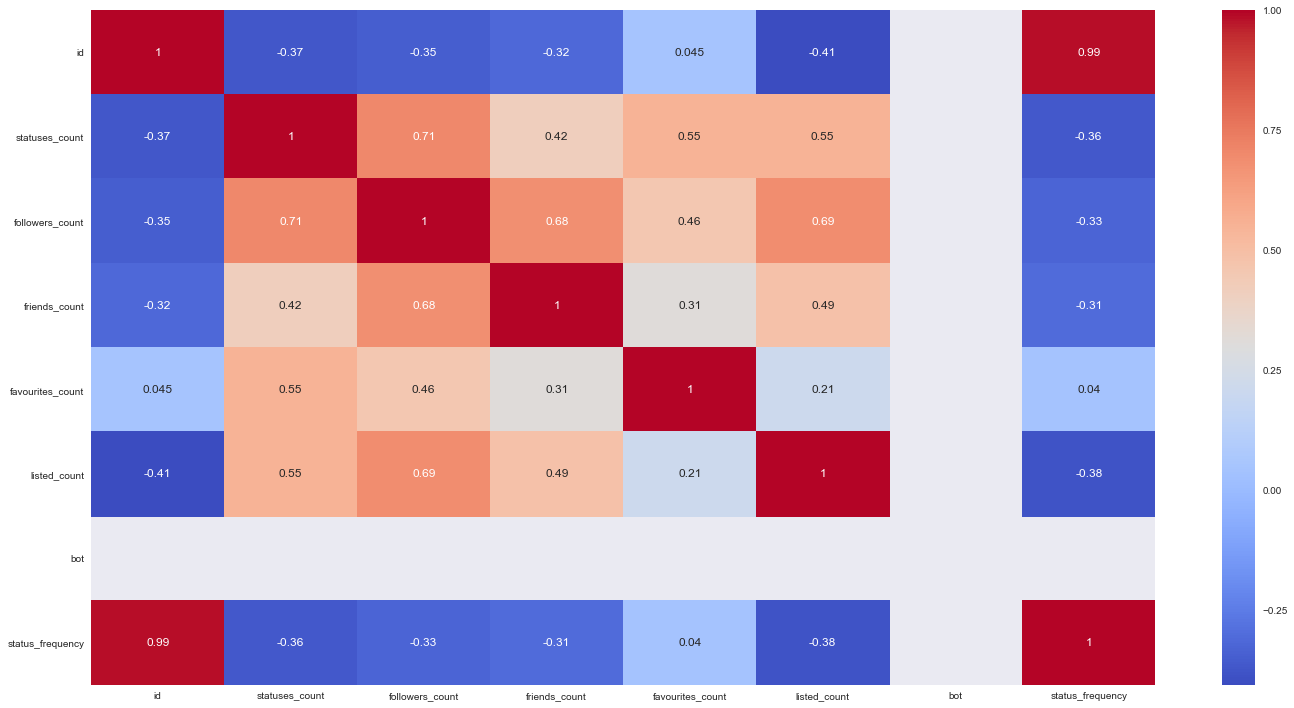

In [191]:
# view human features heatmap
plt.figure(figsize=(20,10))
sns.heatmap(mod_hum_df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

## Merge Dataframes

In [192]:
# create new dataframe
slick_frame = pd.DataFrame()

In [193]:
# merge  dataframes
def merge_df(df1, df2):
    # clean merged dataframe
    cat_frame = [df1, df2]
    concat_frame = pd.concat(cat_frame, ignore_index=True)
    
    return concat_frame
    

In [194]:
slick_frame = merge_df(mod_bots_df, mod_hum_df)

In [195]:
slick_frame.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,timestamp,bot,status_frequency
0,325403988,Borremans Bellman,borremanstpdri2,48,0,1,0,1,Tue Jun 28 07:15:18 +0000 2011,2011-06-28 09:15:18,1,6.857143
1,3298943021,Reward Crazy,CrazyPrize66244,52,0,6,0,0,Tue May 26 08:13:25 +0000 2015,2015-05-26 10:13:25,1,17.333333
2,3305460917,Reward Patrol,CrazyPrize75229,39,0,4,0,0,Mon Jun 01 09:58:30 +0000 2015,2015-06-01 11:58:30,1,13.000000
3,179562837,Dana Shemesh,danashemesh,304,0,0,0,1,Tue Aug 17 16:09:13 +0000 2010,2010-08-17 18:09:13,1,38.000000
4,179295032,Davina Vanwey,DavinaVanwey428,1883,0,0,0,1,Tue Aug 17 00:02:18 +0000 2010,2010-08-17 02:02:18,1,235.375000


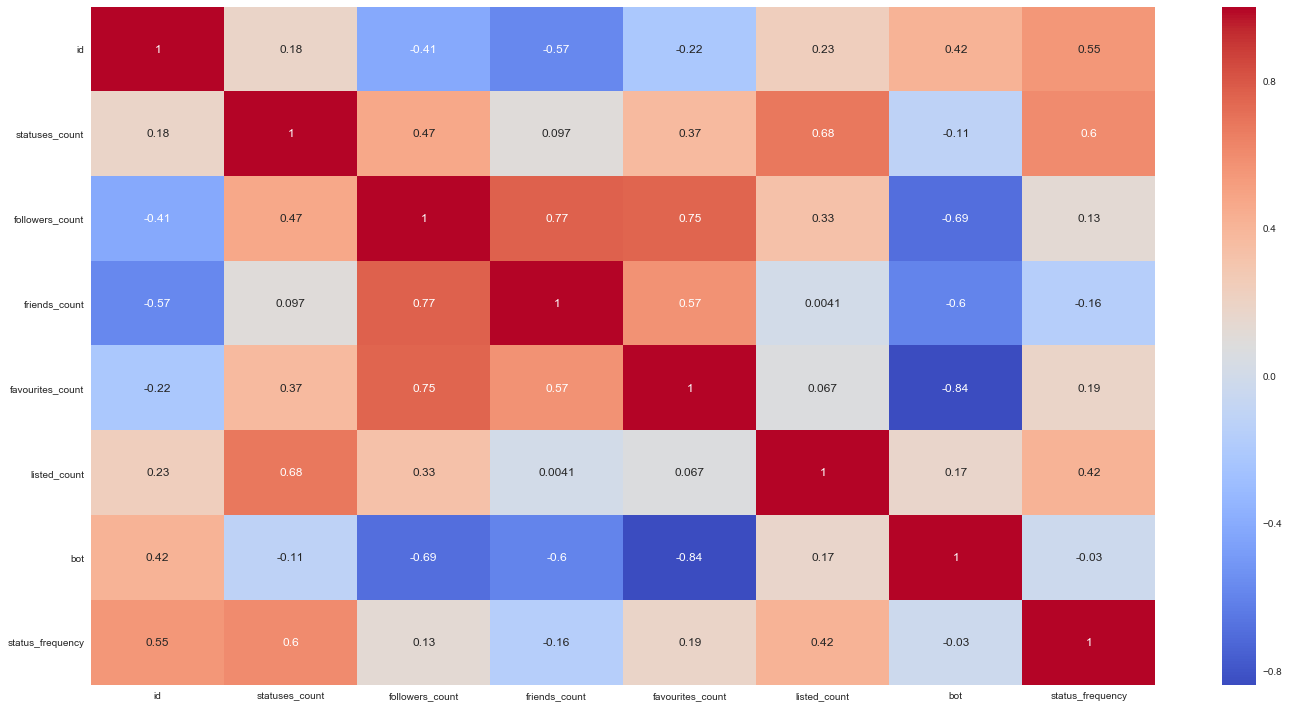

In [196]:
plt.figure(figsize=(20,10))
sns.heatmap(slick_frame.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()